In [2]:
# Linear Regression on Boston Housing Dataset
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset from OpenML
boston = fetch_openml(name="boston", version=1, as_frame=True)

In [4]:
# Features (X) and target (y)
X = boston.data
y = boston.target

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Print regression coefficients and intercept
print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Regression coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Intercept: 30.24675099392366


In [8]:
# Logistic Regression on Iris Dataset with L2 Regularization

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [9]:
# Load dataset
iris = load_iris()
X = iris.data[:, :2]   # Take first two features (Sepal length, Sepal width) for visualization
y = iris.target

In [10]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [11]:
# Train Logistic Regression with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='auto', max_iter=200)
model.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='auto')

In [12]:
# Print coefficients
print("Model Coefficients:\n", model.coef_)
print("Intercepts:\n", model.intercept_)


Model Coefficients:
 [[-2.6116204   1.49553334]
 [ 0.67352959 -0.91294511]
 [ 1.93809082 -0.58258823]]
Intercepts:
 [-1.02611015  0.74413105  0.2819791 ]


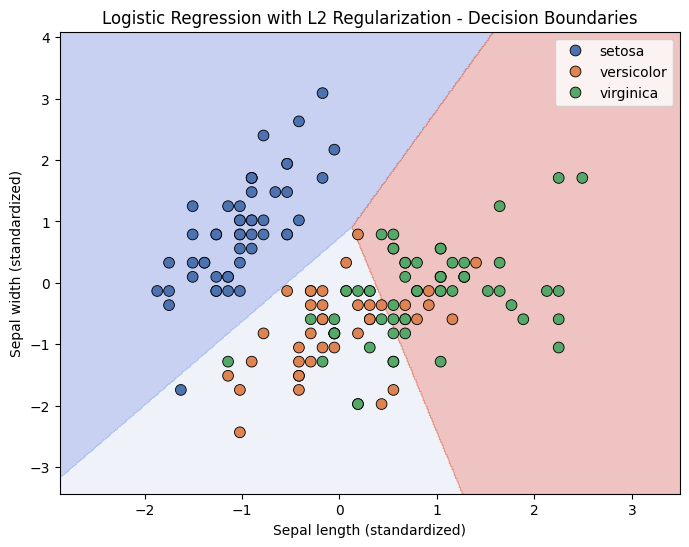

In [13]:
# Decision boundary visualization
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                palette="deep", edgecolor="k", s=60)
plt.xlabel("Sepal length (standardized)")
plt.ylabel("Sepal width (standardized)")
plt.title("Logistic Regression with L2 Regularization - Decision Boundaries")
plt.show()